In [20]:
import os
pathtogs='C:\\Program Files\\gs\\gs9.24\\bin'
os.environ['PATH']+=os.pathsep+pathtogs

### Objective 1

In [46]:
import nltk
from collections import Counter

def GetPOSTags(string):
    tokens=nltk.word_tokenize(string)
    pos_tags=nltk.pos_tag(tokens)
    return pos_tags

def GetNMostFrequentNouns(string,n):
    POSTags=GetPOSTags(string)
    allForms=['NN','NNP','NNS','NNPS']
    count=0
    words=[]
    for word,tag in POSTags:
        if tag in allForms:
            words.append(word.lower())
    c=Counter(words)
    return list(dict(c.most_common(n)).keys())

def GetNMostFrequentVerbs(string,n):
    POSTags=GetPOSTags(string)
    allForms=['VB','VBP','VBZ','VBG','VBD','VBN']
    count=0
    words=[]
    for word,tag in POSTags:
        if tag in allForms:
            words.append(word.lower())
    c=Counter(words)
    return list(dict(c.most_common(n)).keys())

def GetNMostFrequentDelimiters(string,n):
    POSTags=GetPOSTags(string)
    allForms=['DT']
    count=0
    words=[]
    for word,tag in POSTags:
        if tag in allForms:
            words.append(word.lower())
    c=Counter(words)
    return list(dict(c.most_common(n)).keys())


def GetNMostFrequentPrepositions(string,n):
    POSTags=GetPOSTags(string)
    allForms=['IN']
    count=0
    words=[]
    for word,tag in POSTags:
        if tag in allForms:
            words.append(word.lower())
    c=Counter(words)
    return list(dict(c.most_common(n)).keys())



In [55]:
#Run all the function on the file “FIFAWorldCup2018.docx” and print the results.

#reading the file
file=open("FIFAWorldCup2018.txt",'r')
content=file.read()
file.close()

#5 most frequent noun
print "5 Most Frequent Nouns:",GetNMostFrequentNouns(content,5)


#5 most frequent verbs
print "5 Most Frequent Verbs:",GetNMostFrequentVerbs(content,5)



#4 most frequent delimiters
print "4 Most Frequent Nouns:",GetNMostFrequentDelimiters(content,4)


#5 most frequent prepositions
print "5 Most Frequent Perpositions:",GetNMostFrequentPrepositions(content,5)



5 Most Frequent Nouns: ['fifa', 'world', 'bid', 'russia', 'cup']
5 Most Frequent Verbs: ['had', 'is', 'won', 'was', 'were']
4 Most Frequent Nouns: ['a', 'both', 'the', 'an']
5 Most Frequent Perpositions: ['of', 'that', 'from', 'for', 'in']


### Objective 2

In [89]:
import nltk
def PrintSyntaxTree(sent):
    first_sent=sent.split(".")[0]+"."
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(first_sent))
    grammar=r"NP:{<DT>?<JJ>*<NN>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    print first_sent
    return chunk_result

The 2018 FIFA World Cup was the 21st FIFA World Cup, an international football tournament contested by the men's national teams of the member associations of FIFA once every four years.


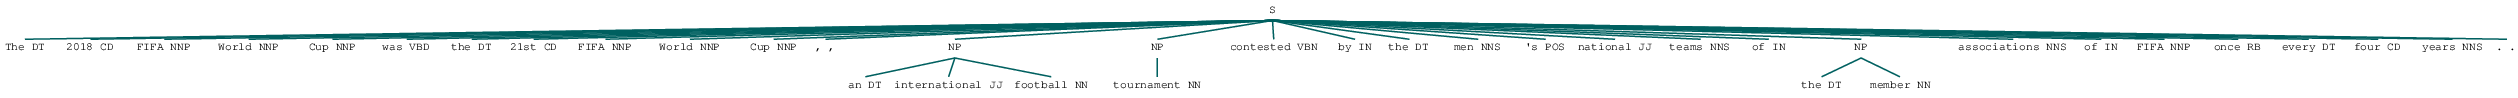

In [90]:
#Run this function on the file “FIFAWorldCup2018.txt” 

#Reading the file
file=open("FIFAWorldCup2018.txt",'r')
content=file.read()
file.close()

#Printing the tree 
PrintSyntaxTree(content)

### Objective 3

In [179]:
import re
def TextAfterRemovingPunctuations(string):
    s = re.sub(r'[^\w\s]','',string)
    return s

def TextAfterRemovingDigits(string):
    s=re.sub(r"(^|\W)\d+", "", string)
    return s

def AllCapitalizedWordsFromText(string):
    s = re.findall(r'(\b[A-Z]([a-z])*\b)',string)
    Capitalized=[]
    for word,lastcharacter in s:
        Capitalized.append(word)
    return Capitalized
    
def AllEmailsFromText(string):
    match = re.findall(r'[\w\.-]+@[\w\.-]+', string)
    return match

In [186]:
#Run all the above functions on the file “FIFAWorldCup2018.txt” and print the results.

#Reading the file
file=open("FIFAWorldCup2018.txt",'r')
content=file.read()
file.close()

print "After Removing Punctuation"
print TextAfterRemovingPunctuations(content)
print "\n"

print "After Removing Digits"
print TextAfterRemovingDigits(content)
print "\n"

print "Capitalized Words"
print AllCapitalizedWordsFromText(content)
print "\n"

print "Emails"
print AllEmailsFromText(content)
print "\n"


After Removing Punctuation
The 2018 FIFA World Cup was the 21st FIFA World Cup an international football tournament contested by the mens national teams of the member associations of FIFA once every four years It took place in Russia from 14 June to 15 July 2018 It was the first World Cup to be held in Eastern Europe and the 11th time that it had been held in Europe At an estimated cost of over 142 billion it was the most expensive World Cup It was also the first World Cup to use the video assistant referee  system 
The finals involved 32 teams of which 31 came through qualifying competitions while the host nation qualified automatically Of the 32 teams 20 had also appeared in the previous tournament in 2014 while both Iceland and Panama made their first appearances at a FIFA World Cup A total of 64 matches were played in 12 venues across 11 cities 
The final took place on 15 July at the Luzhniki Stadium in Moscow between France and Croatia France won the match 42 to claim their second

### Objective 4

In [263]:
import nltk

#Phrases having Proper nouns followed by Verbs
def ChunkingVer1(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"Phrases:{<NNP|NNPS>*<NNP|NNPS><VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    return chunk_result


#Verb Phrases having Verbs followed by Adjectives
def ChunkingVer2(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"VerbPhrases:{<VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN><JJ|JJR|JJS>*<JJ|JJR|JJS>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    return chunk_result

#Noun Phrases having Determiners followed by Nouns
def ChunkingVer3(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"NounPhrases:{<DT><NN|NNS|NNP|NNPS>*<NN|NNS|NNP|NNPS>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    return chunk_result

#Verb Phrases having Verbs followed by Adverbs
def ChunkingVer4(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"VerbPhrases:{<VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN><RB|RBR>*<RB|RBR>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    return chunk_result

#Phrases having Delimiter, Adjectives and Nouns in the respective order.
def ChunkingVer5(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"Phrases:{<DT><JJ><NN|NNP|NNS|NNPS>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    return chunk_result

#Noun Phrases which having Nouns and Adjectives, terminated with Nouns. 
def ChunkingVer6(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"NounPhrases:{<NN|NNP|NNS|NNPS><JJ><NN|NNP|NNS|NNPS>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)

    return chunk_result

In [324]:
#Run all the function for the first sentence in the file “FIFAWorldCup2018.txt” and print the results.

file=open("FIFAWorldCup2018.txt",'r')
content=file.read()
file.close()

first_sent=content.split(".")[0]+"."

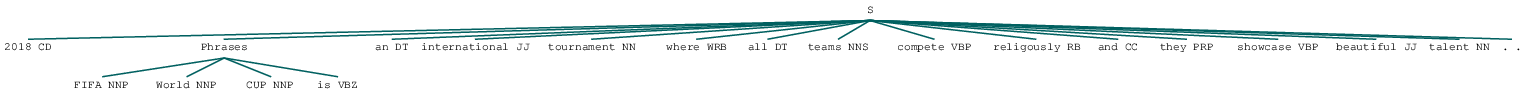

In [325]:
ChunkingVer1(first_sent)

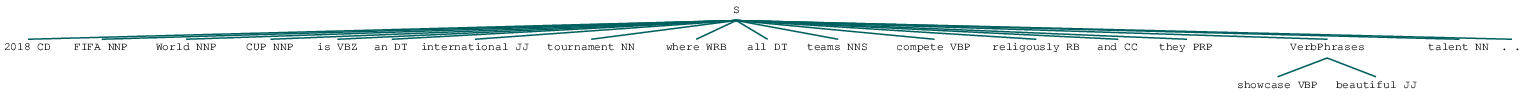

In [326]:
ChunkingVer2(first_sent)

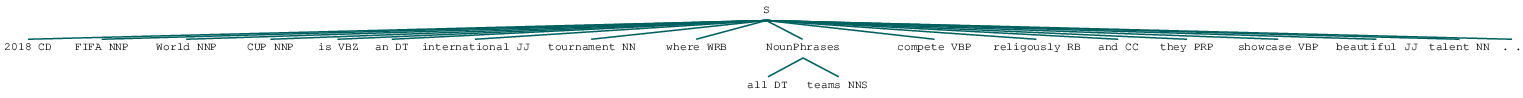

In [327]:
ChunkingVer3(first_sent)

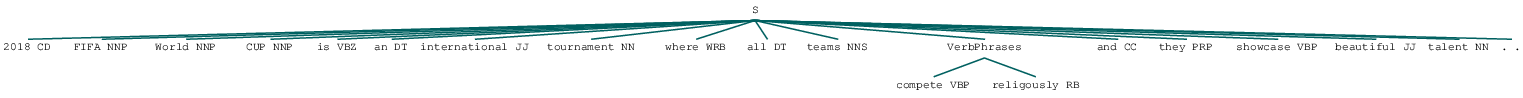

In [328]:
ChunkingVer4(first_sent)

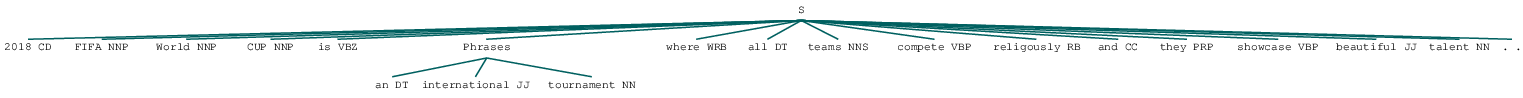

In [329]:
ChunkingVer5(first_sent)

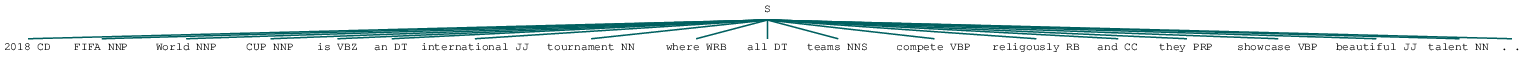

In [330]:
ChunkingVer6(first_sent)

# Objective 5

In [333]:
#2 most common Nouns
print "Nouns:",GetNMostFrequentNouns(content,2)

#2 most common verbs
print "Verbs:",GetNMostFrequentVerbs(content,2)

#2 most common prepositions
print "Prepositions:",GetNMostFrequentPrepositions(content,2)

#2 most common delimiters
print "Delimiters:",GetNMostFrequentDelimiters(content,2)

Nouns: ['world', 'cup']
Verbs: ['had', 'was']
Prepositions: ['of', 'in']
Delimiters: ['a', 'the']


In [345]:
from nltk.parse.generate import generate
grammar = nltk.CFG.fromstring("""
 S -> NP VP
 VP -> V NP | V NP PP
 V -> "had" | "was"
 NP -> DT N 
 DT -> "a" | "the" 
 N -> "world" | "cup"
 PP -> P NP
 P -> "of" | "in"
 """)

generated_grammar=[]
for sent in generate(grammar):
    generated_grammar.append(" ".join(sent))

In [351]:
#Saving in a file name "CGF.txt"

file=open('CFG.txt','a+')
for each in generated_grammar:
    file.write(each+"\n")
file.close()
    